# Data Pre-Processing

#### Import Packages and CSV

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', 100)

df = pd.read_csv('marketing_campaign.csv', sep = '\t')

df.shape

(2240, 29)

# Data Cleaning
## Handeling Missing Values
- Handeling Missing Values
- Handeling Duplicates
- Check data type
- Understand the data

In [32]:
# These are the features with nan value
features_with_na = [feature for feature in df.columns if df[feature].isna().sum() >= 1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 5), '% missing values.')

Income 1.07143 % missing values.


**What does NaN mean?**

**Ans:** Missing Values in a DataFrame

**Why might a value be missing?** 

**Ans:** When considering the potential impact of the missing data on the Dataset, it is important to consider the underlying reasons for why the data are missing
Missing data are of three categories:
* Missing completely at random (MCAR)
* Missing at random (MAR).
* Missing not at random (MNAR). 

Here it is MCAR type of missing values in dataset which are Missing completely at Random. 

When we make this assumption, we are assuming the missing data is completely unrelated to the other information in the data.

In [33]:
# Statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


### Imputing Null values
* **Impute Median value for Income column**
- **Why we are using Median instead of Mean or Mode?**
    - The median is the most informative measure of central tendency for skewed distributions or distributions with outliers. For example, the median is often used as a measure of central tendency for income distributions, which are generally highly skewed

In [34]:
# Age
df.Income.fillna(df.Income.median(), inplace = True)

### 3.2 Other Data Cleaning steps
**Handling Duplicates**

In [35]:
df.duplicated().sum()

np.int64(0)

**Remove ```Z_CostContact``` and ```Z_Revenue``` columns from the dataset as contains only constant value, therefore doesn't create any variance in the dataset.**


In [36]:
columns_to_drop = ['ID', 'Z_CostContact', 'Z_Revenue']
for column in columns_to_drop:
    df.drop(column, inplace = True, axis = 1)
    print(f"Columns {column} is dropped.")

Columns ID is dropped.
Columns Z_CostContact is dropped.
Columns Z_Revenue is dropped.


# Feature Engineering
Feature engineering refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy. Effective feature engineering is based on sound knowledge of the business problem and the available data sources.

## Feature Extraction
- We will extract and create some of the meaningfull features.

### We'll repeat some steps from EDA
### The following code creates features that would be helpful to describe the profile of the customer 


In [37]:
# create new column for feature

from datetime import datetime


df = df.copy()

##  creating a new field to store the Age of the customer
df['Age']=2022-df['Year_Birth']   

###  recoding the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)
df["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)  

#  recoding the customer's marital status to numeric form (0: not living with a partner, 1: living with a partner) 
df['Marital_Status'].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True) 

#  creating a new field to store the number of children in the household
df['Children']=df['Kidhome']+df['Teenhome']

#creating Family_Size
df['Family_Size']=df['Marital_Status']+df['Children']+1



#  creating a new field to store the total spending of the customer
df['Total_Spending']=df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Total Promo"] =  df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

## The following code works out how long the customer has been with the company and store the total number of promotions the customers responded to
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
today=datetime.today()
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["Children"] > 0, 1, 0)






#dropping columns which are already used to create new features
columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)

df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]


In [38]:
df

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,65,2,0,0,0,58138.0,1617,4848,58,635,88,546,172,88,88,8,10,4,3,0,7
1,68,2,0,1,2,46344.0,27,4298,38,11,1,6,2,1,6,1,1,2,2,0,5
2,57,2,1,0,0,71613.0,776,4497,26,426,49,127,111,21,42,8,2,10,1,0,4
3,38,2,1,1,1,26646.0,53,4324,26,11,4,20,10,3,5,2,0,4,2,0,6
4,41,4,1,1,1,58293.0,422,4346,94,173,43,118,46,27,15,5,3,6,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,2,1,1,1,61223.0,1341,4566,46,709,43,182,42,118,247,9,3,4,2,0,5
2236,76,4,1,1,3,64014.0,444,4204,56,406,0,30,0,0,8,8,2,5,7,1,7
2237,41,2,0,0,0,56981.0,1241,4340,91,908,48,217,32,12,24,2,3,13,1,1,6
2238,66,3,1,1,1,69245.0,843,4341,8,428,30,214,80,30,61,6,5,10,2,0,3


### Type of Features
**Numeric Features**

In [39]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Fearture:',len(num_features))

Num of Numerical Fearture: 21


### Categorical Features

In [40]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Number of categorical features:",len(cat_features))

Number of categorical features: 0


### Discrete featrues

In [41]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print("Number of discrete feature:", len(discrete_features))

Number of discrete feature: 10


### Continuous Features

In [42]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print("Number of continuous features:", len(continuous_features))

Number of continuous features: 11


 ” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable “ 
 
**- We can see there are some Multicollinearity in this dataset**

### Check Outlier and Capping it
**Why outliers?**
* Data Entry error : Human error. 
* Measurement error: Instrument error. 
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

**Why IQR For Outlier Handling?**
* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

* The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

* where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

In [43]:
continuous_features

['Age',
 'Income',
 'Total_Spending',
 'Days_as_Customer',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold']

## Outlier Detection

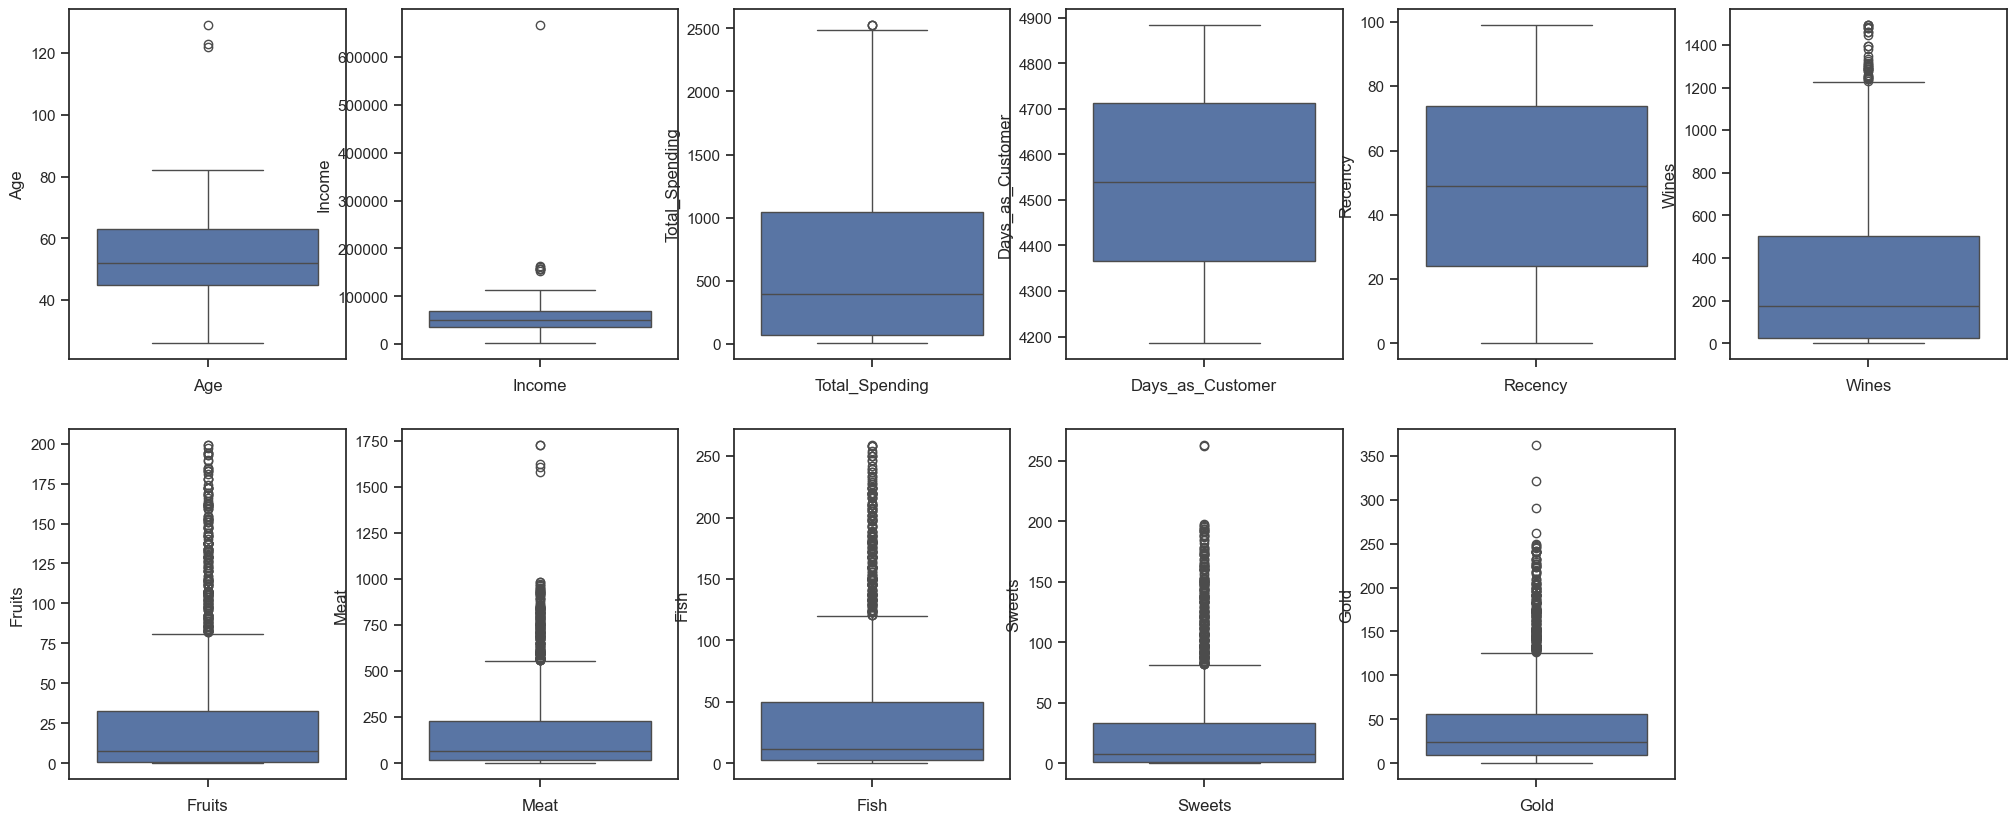

In [44]:
cont_features = continuous_features.copy()
plt.figure(figsize = (25, 10))

for i in range(len(cont_features)):
    plt.subplot(2,6,i+1)
    sns.set_style('ticks')
    plt.xlabel(cont_features[i])
    ax = sns.boxplot(df[cont_features[i]])

**report**
- We can see, there are no such outliers in ```Recency``` and ```Days_as_Customer``` Column
- But there are outliers in following columns - 
    - Income
    - Wines
    - Fruits
    - Meat
    - Fish
    - Sweets
    - Gold
    - Age
    - Total Spending

**Detecting Outliers and Capping it**

In [45]:
def detect_outliers(col):
    #Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    
    print('\n ####', col, '####')
    print('Percentile25',percentile25)
    print('Percentile75', percentile75)
    
    IQR = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    
    print('Upper Limit', upper_limit)
    print('Lower Limit', lower_limit)
    
    df.loc[(df[col] > upper_limit), col] = upper_limit
    df.loc[(df[col] < lower_limit), col] = lower_limit
    
    return df

**Why are we capping it and why not trim it ?**
* Trimming outliers may result in the removal of a large number of records from this dataset as we have already very less rows so this isn’t desirable in this case since columns other than the ones containing the outlier values may contain useful information.

* In this cases, you can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.

In [46]:
for col in continuous_features:
    detect_outliers(col)


 #### Age ####
Percentile25 45.0
Percentile75 63.0
Upper Limit 90.0
Lower Limit 18.0

 #### Income ####
Percentile25 35538.75
Percentile75 68289.75
Upper Limit 117416.25
Lower Limit -13587.75

 #### Total_Spending ####
Percentile25 68.75
Percentile75 1045.5
Upper Limit 2510.625
Lower Limit -1396.375

 #### Days_as_Customer ####
Percentile25 4365.75
Percentile75 4714.0
Upper Limit 5236.375
Lower Limit 3843.375

 #### Recency ####
Percentile25 24.0
Percentile75 74.0
Upper Limit 149.0
Lower Limit -51.0

 #### Wines ####
Percentile25 23.75
Percentile75 504.25
Upper Limit 1225.0
Lower Limit -697.0

 #### Fruits ####
Percentile25 1.0
Percentile75 33.0
Upper Limit 81.0
Lower Limit -47.0

 #### Meat ####
Percentile25 16.0
Percentile75 232.0
Upper Limit 556.0
Lower Limit -308.0

 #### Fish ####
Percentile25 3.0
Percentile75 50.0
Upper Limit 120.5
Lower Limit -67.5

 #### Sweets ####
Percentile25 1.0
Percentile75 33.0
Upper Limit 81.0
Lower Limit -47.0

 #### Gold ####
Percentile25 9.0
Percenti

In [47]:
df[continuous_features].skew(axis = 0, skipna = True)

Age                 0.120199
Income              0.090027
Total_Spending      0.860245
Days_as_Customer   -0.015216
Recency            -0.001987
Wines               1.096611
Fruits              1.233953
Meat                1.213585
Fish                1.230822
Sweets              1.213346
Gold                1.111307
dtype: float64

## Feature Transformation

### Scaling 
- **What is Feature Scaling**
    - Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
- **Why we use feature scaling?**
    - the feature scaling was implemented to prevent any skewness in the contour plot of the cost function which affects the gradient descent but the analytical solution using normal equation does not suffer from the same drawback.

- StandardScaler
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

- PowerTransformer
Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

- ColumnTransformer
Applies transformers to columns of an array or pandas DataFrame. This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.

- SimpleImputer
SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder.

- Pipeline
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__' .

In [48]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ["Wines","Fruits","Meat","Fish","Sweets","Gold","Age","Total_Spending"]
numeric_features = [feature for feature in numeric_features if feature not in outlier_features]

In [49]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

dataC = df.copy()

numeric_pipeline = Pipeline(
    steps = [
        ("Imputer", SimpleImputer(strategy = 'constant', fill_value = 0)),
        ("StandardScaler", StandardScaler())
    ]
)

outlier_features_pipeline = Pipeline(
    steps = [
        ("Imputer", SimpleImputer(strategy = 'constant', fill_value = 0)),
        ("Transformer", PowerTransformer(standardize = True))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("Numeric Pipeline", numeric_pipeline, numeric_features),
        ("Outlier Feature Pipeline", outlier_features_pipeline, outlier_features)
    ]
)

columns = dataC.columns
dataC = preprocessor.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns = columns)
print("After scaling, let's have a glimpse of the scaled dataset :")
scaled_data.head()

After scaling, let's have a glimpse of the scaled dataset :


,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,-0.458383,-1.346874,-1.584605,-1.264505,0.299651,1.531185,0.307039,1.409304,2.510890,-0.550785,0.349414,-0.439037,0.693904,1.062784,1.487681,1.504406,1.493989,1.474200,1.196801,1.005341,1.315365
1,-0.458383,-1.346874,0.631072,1.396361,-0.263808,-1.190545,-0.383664,-1.110409,-0.568720,-1.166125,-0.168236,-0.439037,-0.130463,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,-0.967034,1.239521,-1.441417
2,-0.458383,0.742460,-1.584605,-1.264505,0.943420,-0.205773,-0.798086,1.409304,-0.226541,1.295237,-0.685887,-0.439037,-0.542647,0.748918,1.145877,0.456428,1.435812,0.579704,0.473642,0.361223,0.661170
3,-0.458383,0.742460,0.631072,0.065928,-1.204881,-1.061881,-0.798086,-0.750450,-0.910898,-0.550785,-0.168236,-0.439037,0.281720,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,-1.069040,-1.315014,-1.117211
4,1.533425,0.742460,0.631072,0.065928,0.307056,-0.953012,1.550305,0.329427,0.115638,0.064556,1.384715,-0.439037,-0.130463,0.123712,1.058075,0.406278,0.832291,0.741799,-0.368949,-1.033428,0.179322


In [50]:
scaled_data.shape

(2240, 21)

### Model Building ( Clustering )

We know that our dataset it unsupervised, that means we don't have such target column. So we will be using clustering algorithms first to cluster the dataset and create target levels out of it. 

- What is Clustering?
> Using a clustering algorithm means you're going to give the algorithm a lot of input data with no labels and let it find any groupings in the data it can. Those groupings are called clusters. A cluster is a group of data points that are similar to each other based on their relation to surrounding data points.

Here for Clustering Problem statement, 4 Algorithms are used.

- K-Means Clustering
- Agglomerative Clustering
- Gaussian Mixture
- DBSCAN

### Create a function for Silhouette score plot
- **What is silhouette score**

The silhouette value is a measure of how similar an object is to its o**wn cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [51]:
# this function we take it from sklearn page for ploting silhouette with little Modification 
#ploting silhouette_plot aside with clustring results in PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from matplotlib import cm

def silhouette_plot(model,range_n_clusters,X_clustering,pca,**kwargs):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_clustering) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = model(n_clusters,**kwargs)
        cluster_labels = clusterer.fit_predict(X_clustering)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_clustering, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_clustering, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
    #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        sns.scatterplot(
            x = pca[:, 0],
            y = pca[:, 1],
            hue=cluster_labels,
            palette=sns.color_palette("colorblind", len(set(cluster_labels))),
            alpha=0.7,
            legend="full",
            ax = ax2
        )
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            f"Silhouette analysis for {model.__name__} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

## PCA (Principal Component Analysis)
There is many high correlation feature so we will use some dimentinality reduction. 
We can use PCA

* Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

* Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

In [52]:
# Applying PCA
from sklearn.decomposition import PCA

df_scaled = scaled_data.copy()

var_ratio = {}

for n in range(2, 18):
    pc = PCA(n_components = n)
    df_pca = pc.fit(df_scaled)
    var_ratio[n] = sum(df_pca.explained_variance_ratio_)

### Choosing PCA` n_components` and Kmeans `n_clusters` based on Clustering metrics

In [53]:
# Applying PCA and display clustering metrics
from sklearn.cluster import KMeans

for y in range(2, 8):
    print("PCA with # of components:", y)
    
    pca = PCA(n_components = y)
    data_p = pca.fit_transform(df_scaled)
    
    for x in range(2, 7):
        kmeans = KMeans(n_clusters = x)
        label = kmeans.fit_predict(data_p)
        print('Silhouette-Score for', x, 'Clusters', silhouette_score(data_p, label), '-  Inertia: ',kmeans.inertia_)

PCA with # of components: 2
Silhouette-Score for 2 Clusters 0.5284351276031598 -  Inertia:  9059.717502690131
Silhouette-Score for 3 Clusters 0.5101521116130017 -  Inertia:  5130.382226593739
Silhouette-Score for 4 Clusters 0.45277333703737105 -  Inertia:  3979.7815161052254
Silhouette-Score for 5 Clusters 0.43525877918763267 -  Inertia:  3311.5660340374734
Silhouette-Score for 6 Clusters 0.4019353840377672 -  Inertia:  2870.704011435396
PCA with # of components: 3
Silhouette-Score for 2 Clusters 0.4545114449026287 -  Inertia:  12743.428556551426
Silhouette-Score for 3 Clusters 0.40649011339719776 -  Inertia:  8794.938076493443
Silhouette-Score for 4 Clusters 0.3330923553277924 -  Inertia:  7454.423616633892
Silhouette-Score for 5 Clusters 0.31430737548067733 -  Inertia:  6300.866273783984
Silhouette-Score for 6 Clusters 0.3045259240222803 -  Inertia:  5783.936890118686
PCA with # of components: 4
Silhouette-Score for 2 Clusters 0.4174324110950721 -  Inertia:  15190.87628877521
Silhoue

**Report**
* **We can go with PCA with 2 components.**
* **We can go with Kmeans Clusters in the range of 4-6 as it has Good score with lesser Inertia compared to others**

In [54]:
# Reducing the dimensions of the data
pca_final = PCA(n_components = 2, random_state = 42).fit(df_scaled)

reduced = pca_final.fit_transform(df_scaled)
pcadf = pd.DataFrame(reduced)
pcadf.columns = ['PC1', 'PC2']

pcadf.head(10)

,PC1,PC2
0,4.130751,0.501059
1,-3.495848,-0.524323
2,3.032352,-0.850799
3,-2.794852,-1.108400
4,0.786683,0.794184
5,1.105611,0.968065
6,1.539503,1.352260
7,-1.842628,0.488612
8,-3.457028,-0.155012
9,-5.229958,1.478703


##### The explained variance ratio is the percentage of variance that is attributed by each of the selected components.

In [55]:
pca_final.explained_variance_ratio_

array([0.39488178, 0.10833485])

#### Elbow Method to find best Clusters for K-Means
- In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape.

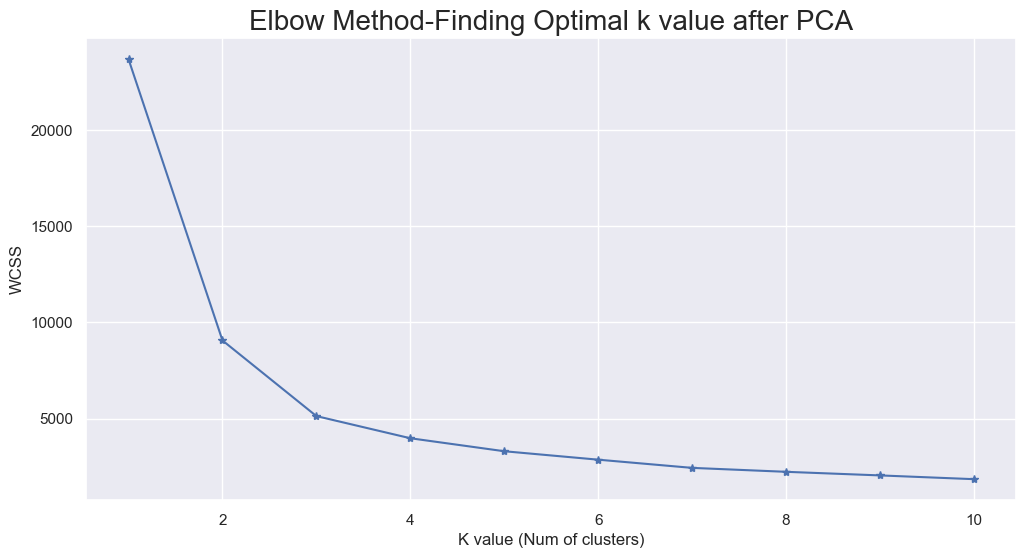

In [56]:
wcss = {}
sns.set()
plt.figure(figsize = (12, 6))

for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(pcadf)
    wcss[i] = km.inertia_
    
plt.plot(range(1, 11), wcss.values(), marker = '*')
plt.title('Elbow Method-Finding Optimal k value after PCA', fontsize = 20)
plt.xlabel('K value (Num of clusters)')
plt.ylabel('WCSS')
plt.show()

- Here the optimum number of cluster is 3 cluster since it is the place where the graph start to flatten out meaning that having higher number of cluster will not yield a much more fitting machine.

**Reports:**

* We will use **k = 3**, thus there will be **three clusters** in our dataset.
* We will use **KMeans Algorithm** for clustering.

#### Silhoutte Score Plot for K-Means to choose best number of clusters

For n_clusters = 3 The average silhouette_score is : 0.5102088250272875
For n_clusters = 4 The average silhouette_score is : 0.45277333703737105
For n_clusters = 5 The average silhouette_score is : 0.4332805300829247
For n_clusters = 6 The average silhouette_score is : 0.39280105230468865


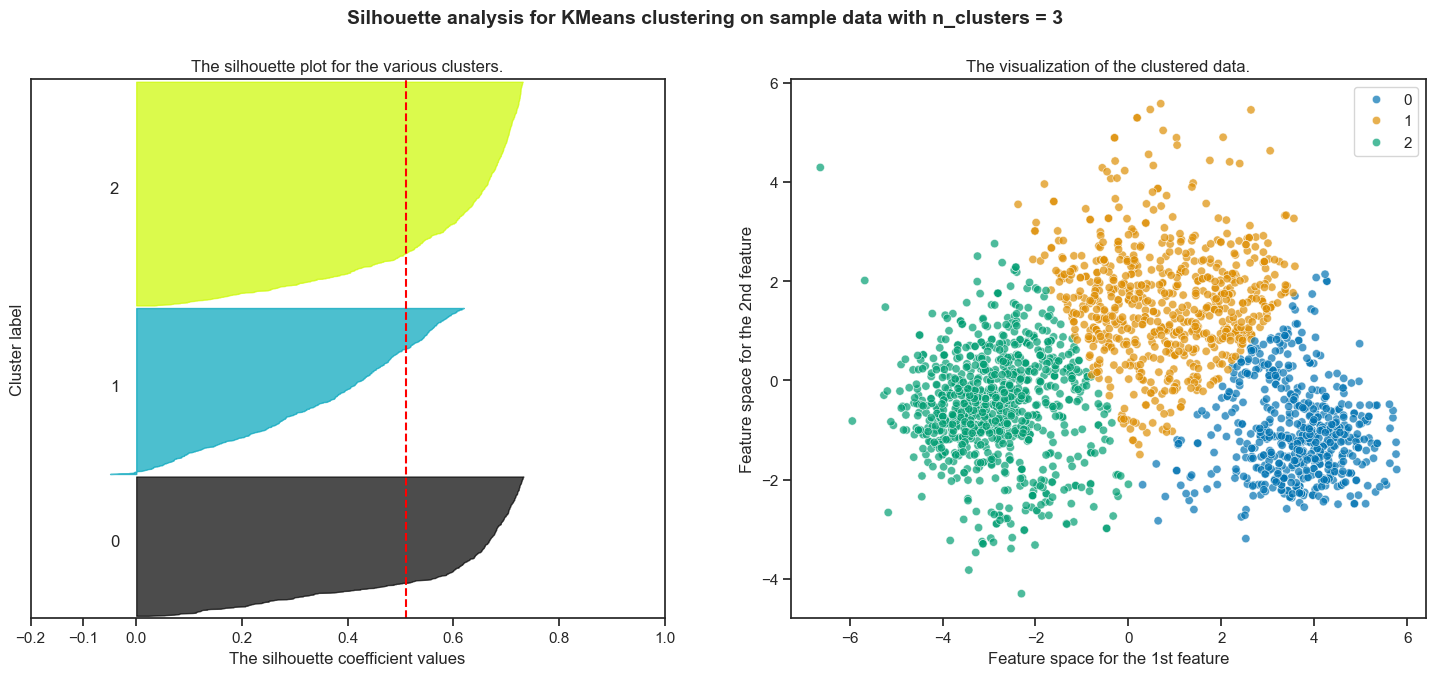

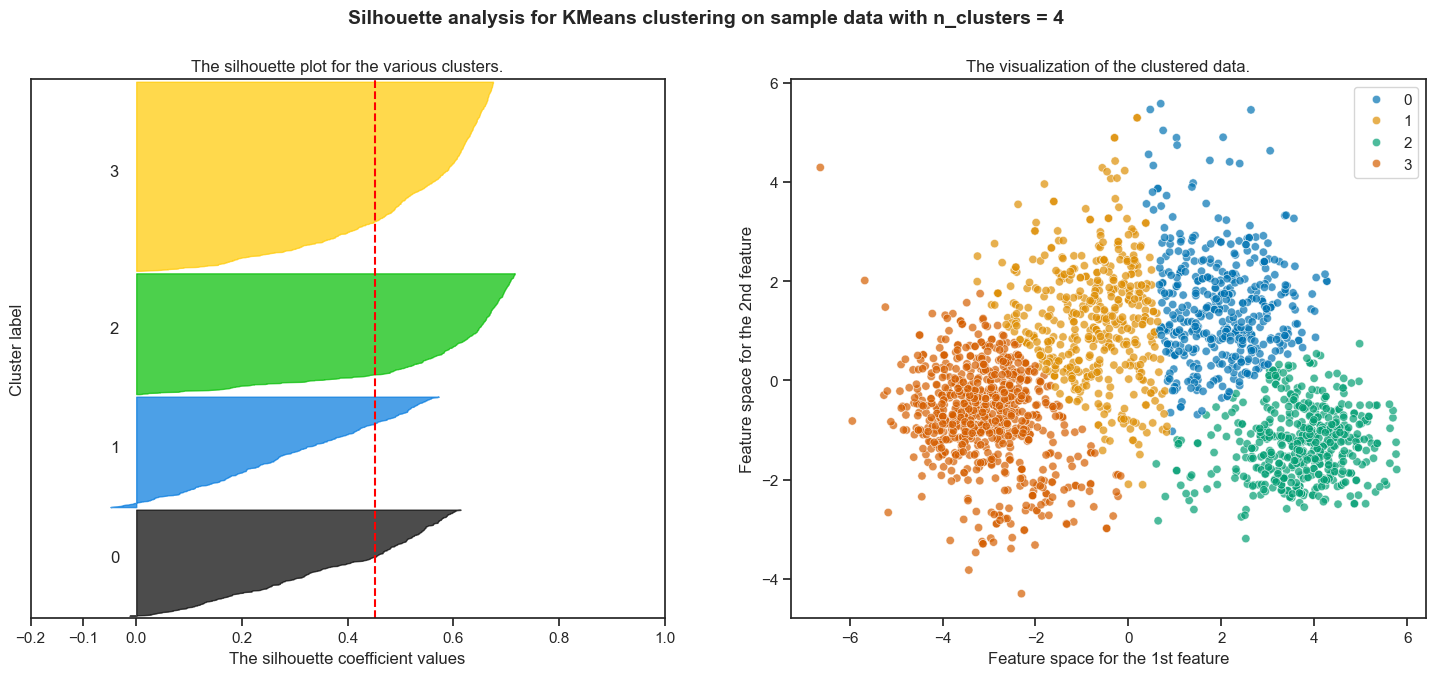

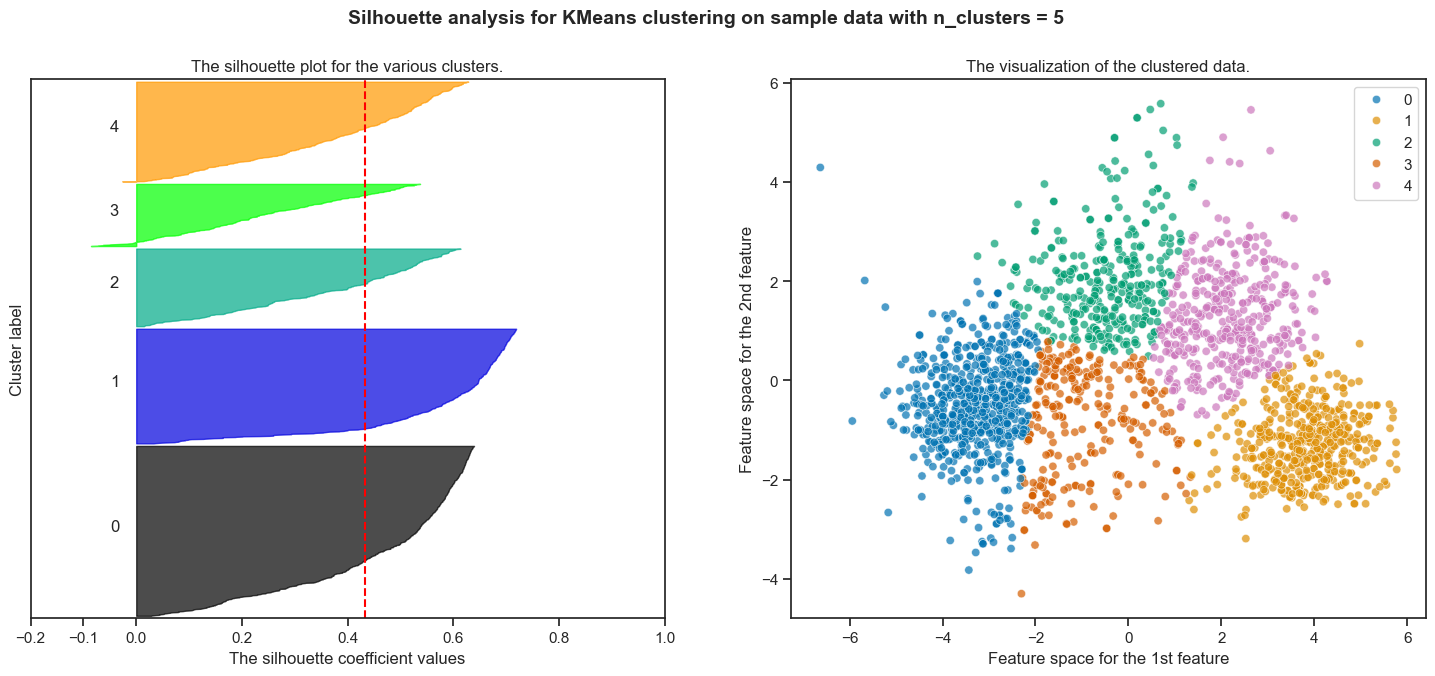

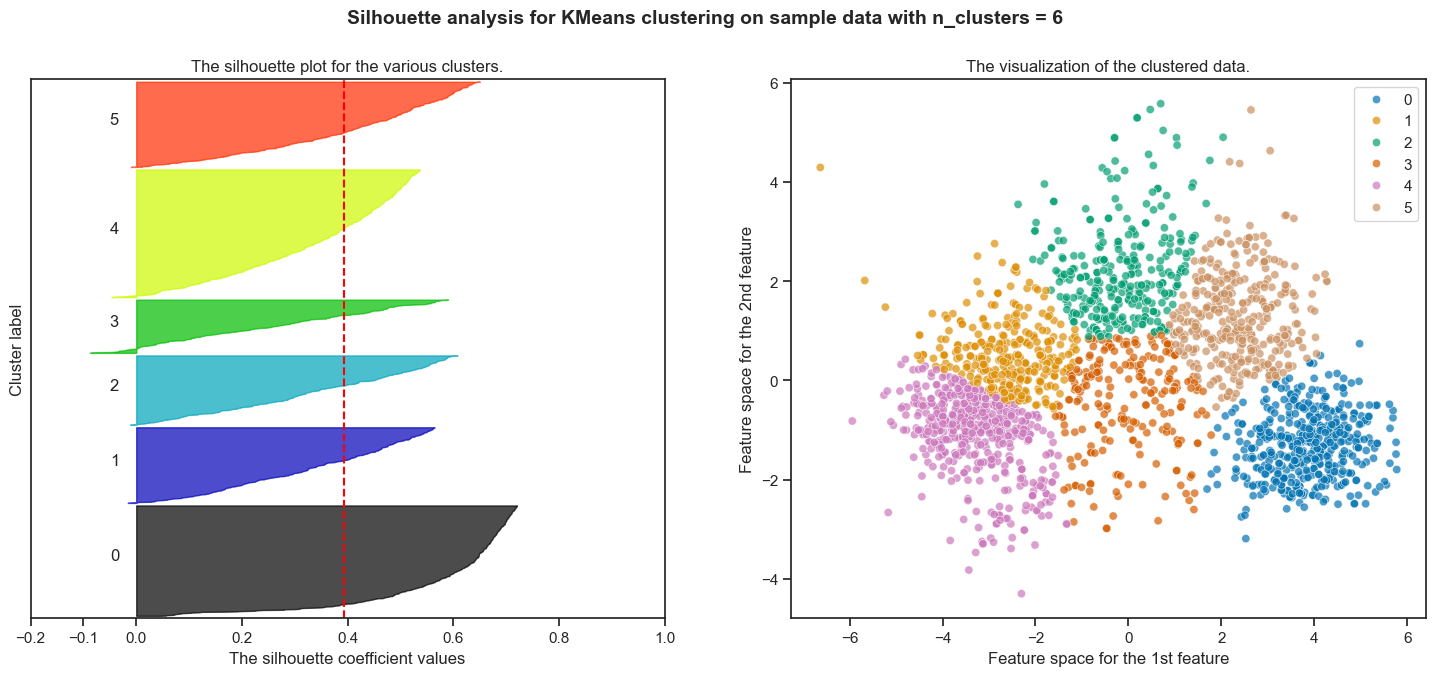

In [57]:
# We plot silhoutte score for Kmeans
# Here pcadf is pca dataframe, and Reduced is array of data after PCA.
sns.set_style('ticks')
silhouette_plot(KMeans,range(3,7), pcadf, reduced)

#### For n_clusters = 3 The average silhouette_score is : 0.5104
#### For n_clusters = 4 The average silhouette_score is : 0.4565
#### For n_clusters = 5 The average silhouette_score is : 0.42996
#### For n_clusters = 6 The average silhouette_score is : 0.390


**Conclusions**
* Clusters of 3 has good balance of Inertia and Shilloute score, we can go with with 3 clusters.


### Apply Kmeans Clustering with 3 clusters

In [58]:
# Fitting the model to reduced data
model = KMeans(n_clusters = 3).fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_

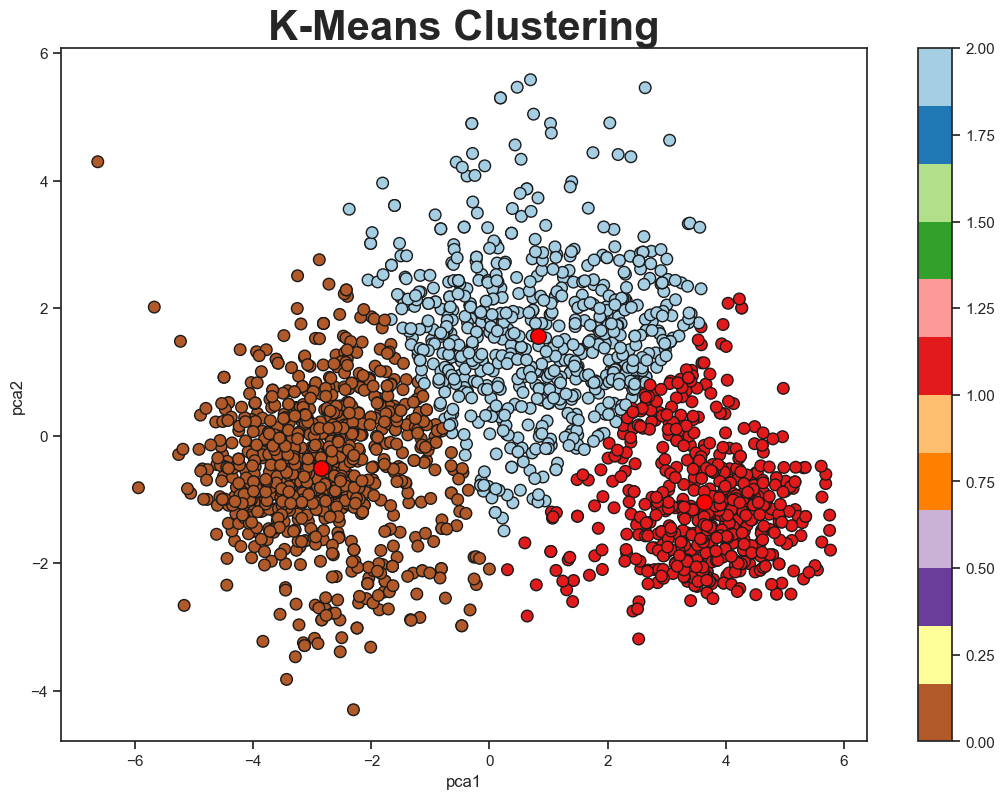

In [60]:
#Plotting the clusters
plt.figure(figsize=(13,9))
plt.title('K-Means Clustering', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=70, cmap='Paired_r', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='.',s=500, ec='k')

### Hierarchical clustering (Agglomerative)
* Agglomerative Clustering: Also known as bottom-up approach or hierarchical agglomerative clustering (HAC). 
* A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. 
* Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data.

#### Silhoutte Score Plot for Agglomerative Clustering to choose best number of clusters
- We will go with the n_clusters range of 3-7 to find the best cluster for Agglomerative clustering

For n_clusters = 3 The average silhouette_score is : 0.4731726613035477
For n_clusters = 4 The average silhouette_score is : 0.4390868135631675
For n_clusters = 5 The average silhouette_score is : 0.41652907940470996
For n_clusters = 6 The average silhouette_score is : 0.39363131887326636
For n_clusters = 7 The average silhouette_score is : 0.3896956269653036


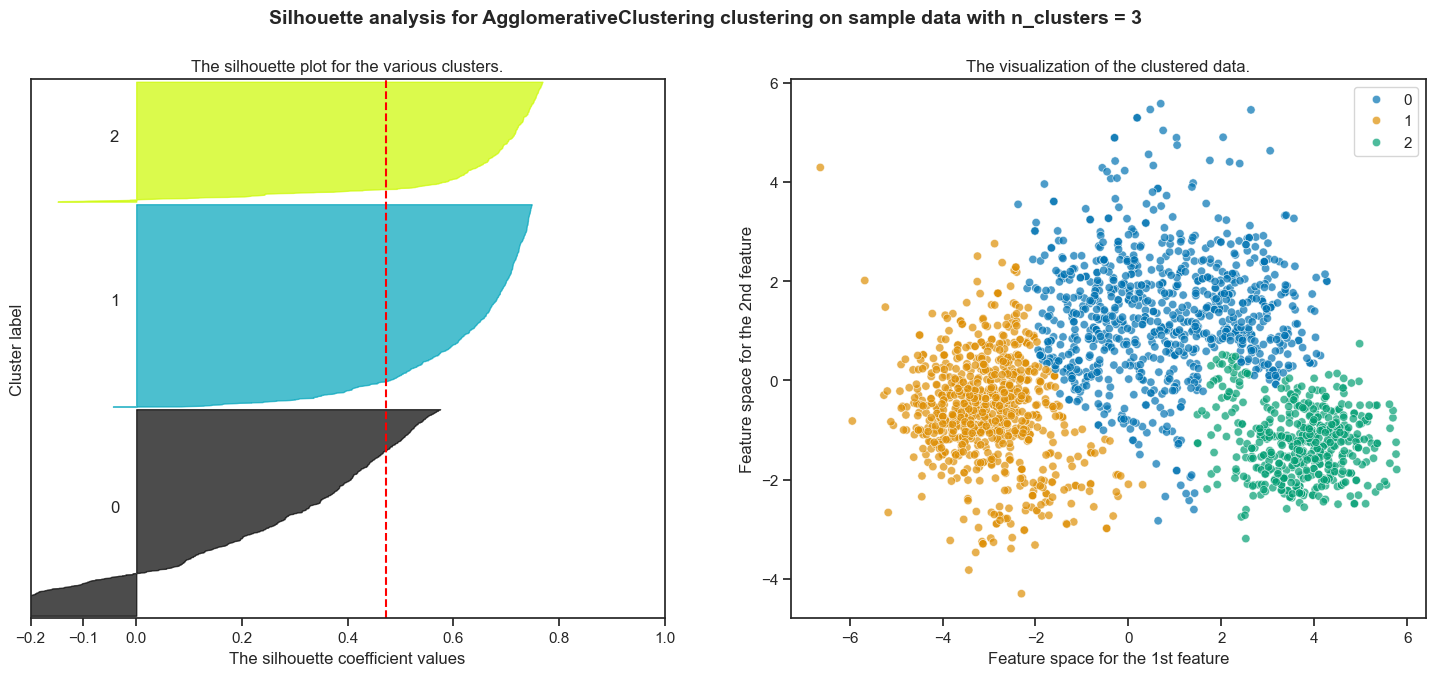

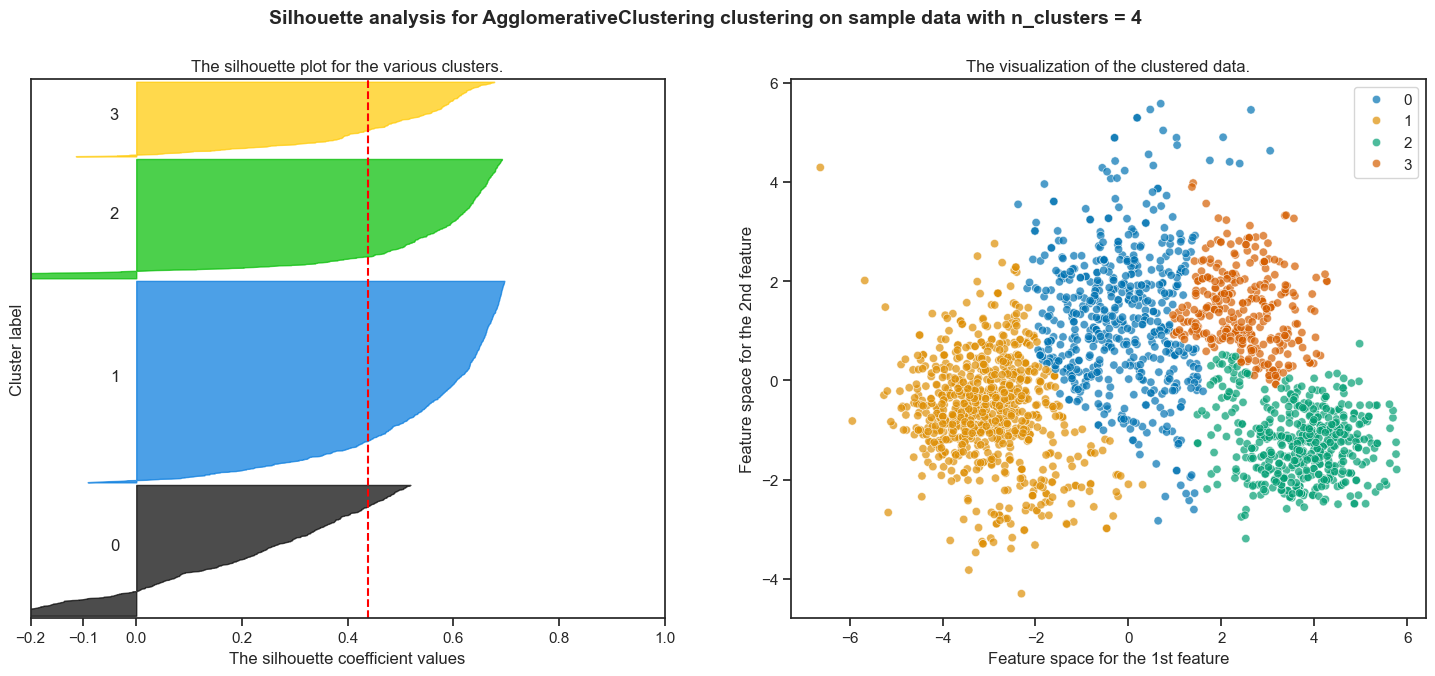

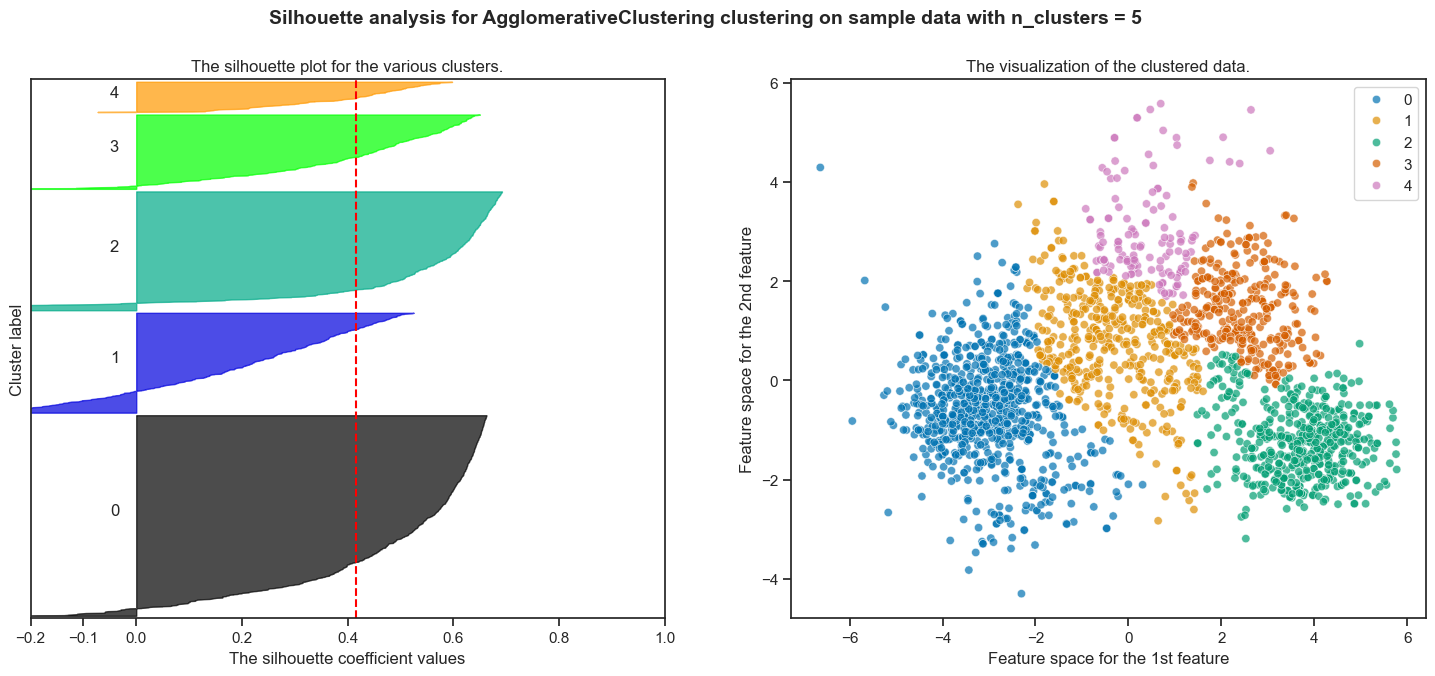

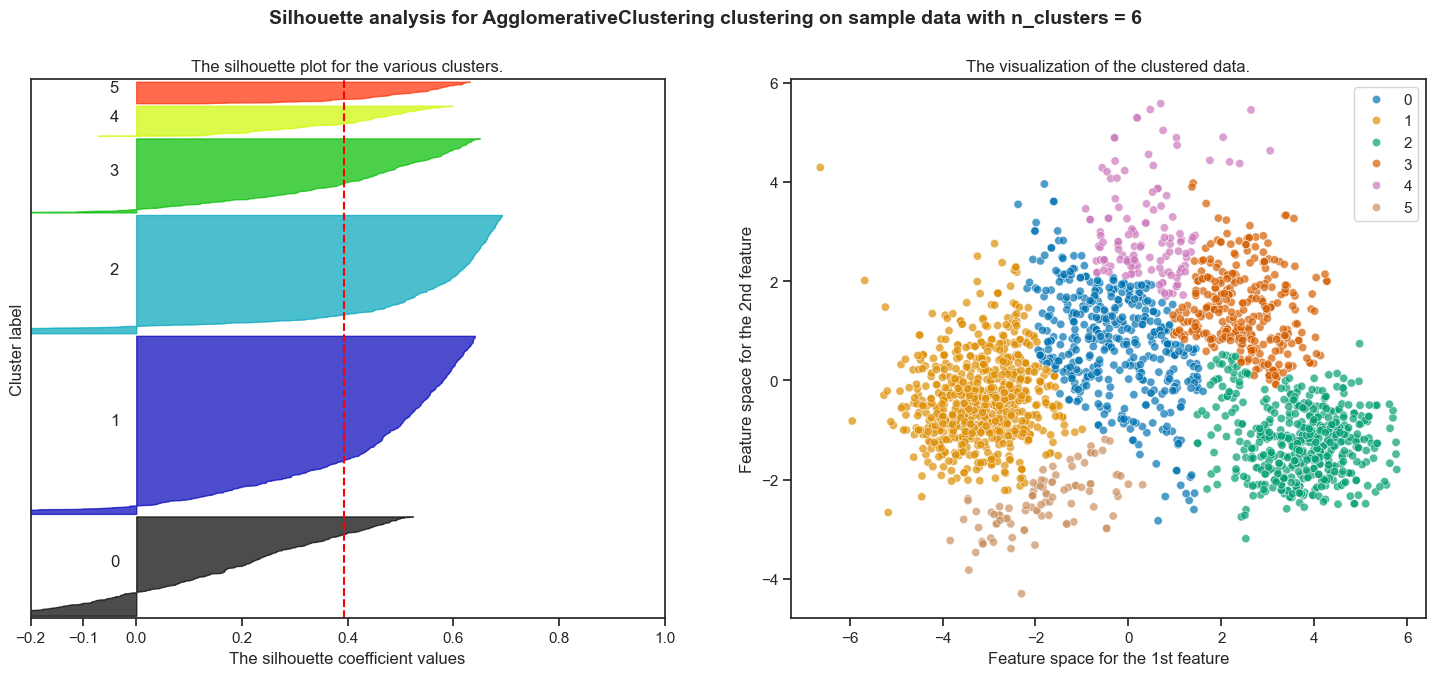

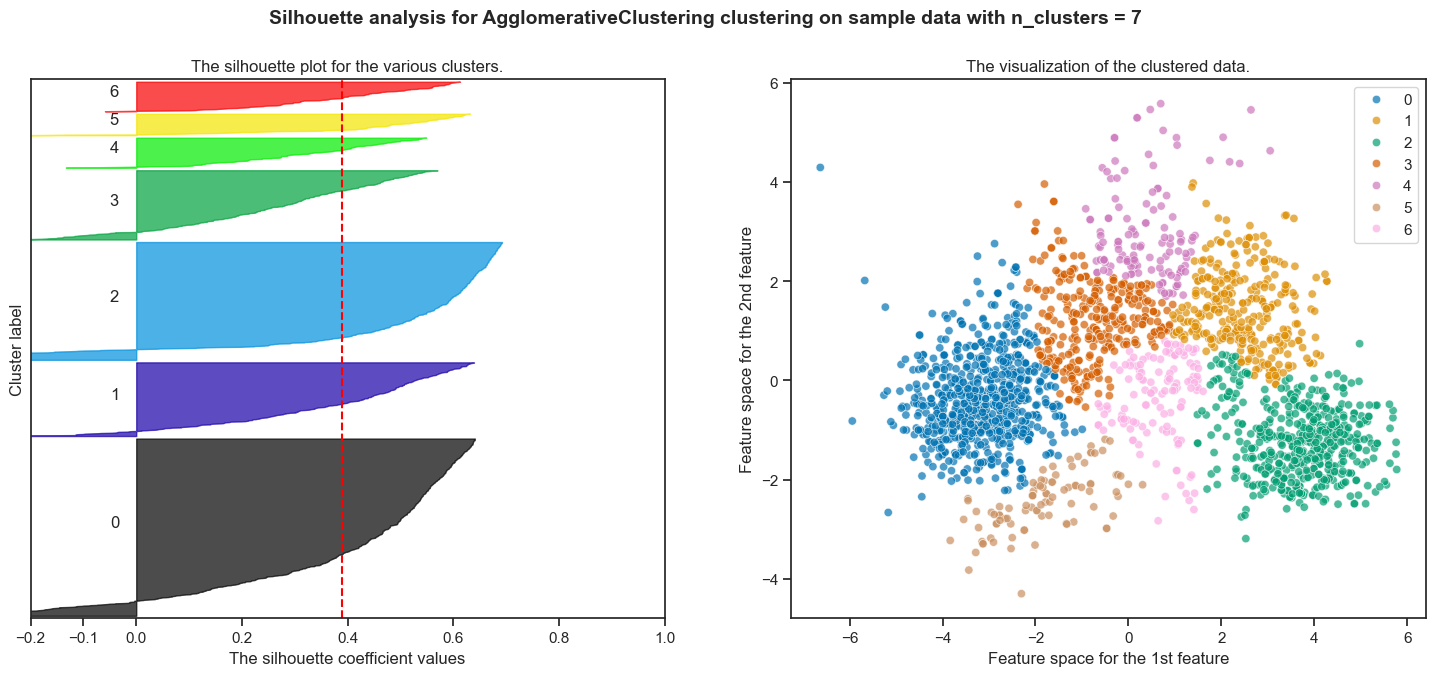

In [61]:
from sklearn.cluster import AgglomerativeClustering

silhouette_plot(AgglomerativeClustering, range(3, 8), pcadf, reduced)

#### Visualization of Agglomerative Clustering
best average silhouette_score is : 0.479

### For n_clusters = 3 The average silhouette_score is : 0.4793304219958075
### for n_clusters = 4 The average silhouette_score is : 0.4422221719419182
### for n_clusters = 5 The average silhouette_score is : 0.44374523677707167
### for n_clusters = 6 The average silhouette_score is : 0.37663609855276475
### for n_clusters = 7 The average silhouette_score is : 0.38077029061500806


**Conclusions**
* Clusters of 3 has good balance of Inertia and Shilloute score, we can go with with 3 clusters.
